assignment_6_Weather.ipynb  
Author: Niamh Hogan

# <b>Knock Airport Weather Plots</b>  

This notebook uses [Knock Airport Weather Data](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv) to create the following plots:  

-  Section 1 Plot Temperature:  
    - 1.1 The temperature  
    - 1.2 The mean temperature each day  
    - 1.3 The mean temperature for each month  
  
- Section 2 Plot Windspeeds:
    - 2.1 The Windspeed (missing data)
    - 2.2 The rolling windspeed (over 24 hours)  
    - 2.3 The max windspeed for each day  
    - 2.4 The monthly mean of the daily max windspeeds  

For Section 1, I created two temperature plots for each plot: one covering the full period from 1996 to 2025, and another focusing on shorter time frames to provide a closer view of the weather data trends.  
In Section 2, the plots focus on shorter periods to allow for more detailed analysis of patterns and variations.  

A short Markdown explanation is included before each code cell. The code follows PEP8 style and avoids over-commenting.

<b>Dataset Variable Abbreviations Utilised:</b>  

- date:    Date and Time (utc)  
- temp:    Air Temperature (C)  
- wdsp:    Mean Wind Speed (knot)

<b>Step 1: Data Import & Cleaning</b>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

<b>Data Importing</b>  

I loaded the dataset directly from the URL provided using *pd.read_csv()*.  
I used the *skiprows=23* argument because the file includes 23 lines of metadata above the header row.  
I used *low_memory=False* so pandas reads the entire file at once, which prevents mixed-type warnings and ensures columns are assigned correct data types.  
[Official Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) was utilized to create the code. 

In [37]:
df = pd.read_csv(
    "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv",
    skiprows=23,
    low_memory=False,
)

df.tail(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
257151,30-nov-2025 22:00,0,2.2,0,8.2,0,8.2,8.2,10.9,100,...,2,10,2,200,,,0.0,1100,2,8
257152,30-nov-2025 23:00,0,1.7,0,8.3,0,8.3,8.3,10.9,100,...,2,6,2,220,,,0.0,1300,2,8
257153,01-dec-2025 00:00,0,0.2,0,8.4,0,8.4,8.4,11.0,100,...,2,8,2,200,,,0.0,400,2,8


<b>Checking Data Types</b>

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257154 entries, 0 to 257153
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    257154 non-null  object 
 1   ind     257154 non-null  int64  
 2   rain    257154 non-null  object 
 3   ind.1   257154 non-null  int64  
 4   temp    257154 non-null  float64
 5   ind.2   257154 non-null  int64  
 6   wetb    257154 non-null  float64
 7   dewpt   257154 non-null  float64
 8   vappr   257154 non-null  float64
 9   rhum    257154 non-null  int64  
 10  msl     257154 non-null  object 
 11  ind.3   257154 non-null  int64  
 12  wdsp    257154 non-null  object 
 13  ind.4   257154 non-null  int64  
 14  wddir   257154 non-null  object 
 15  ww      257154 non-null  object 
 16  w       257154 non-null  object 
 17  sun     257154 non-null  float64
 18  vis     257154 non-null  object 
 19  clht    257154 non-null  object 
 20  clamt   257154 non-null  object 
dtypes: float64

<b>Converting date to datetime</b>  

The date column was stored as a string, so I converted it to a datetime object using *pd.to_datetime()*.  
I used *pd.to_datetime()* to convert the date column because time-series analysis requires datetime formatting for proper data manipulation and plotting ([Official Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)). Some dates had mixed formats, so pandas shows a warning, but all parseable dates are correctly converted.

In [39]:
df['date'] = pd.to_datetime(df['date'])
df['date']

/tmp/ipykernel_2315/3672094586.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
257149   2025-11-30 20:00:00
257150   2025-11-30 21:00:00
257151   2025-11-30 22:00:00
257152   2025-11-30 23:00:00
257153   2025-12-01 00:00:00
Name: date, Length: 257154, dtype: datetime64[ns]

<b>Setting Index</b>  

After converting the date, I set it as the DataFrame index using *df.set_index()*, allowing for efficient time-based indexing and making later resampling (daily/monthly means) straightforward ([Official Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)). 

In [40]:
df.set_index('date', inplace=True)
df.index.dtype

dtype('<M8[ns]')

# <b>Section 1: Plot the Temperature</b>

<b>1.1 Temperature plot</b>

- <b>1996-2025 Temp Plot</b>

Below, I visualized the temperature data from 1996 to 2025 using a line plot to show trends over time.
I set the figure size with Matplotlib for readability ([Matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)) and used Seaborn’s lineplot to control color, transparency, and labeling ([Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)).  
The transparency reduces clutter ([Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)), and I added a legend, title, and axis labels using Matplotlib for full control over the layout ([Matplotlib documentation](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)).

Text(0, 0.5, 'Temperature (°C)')

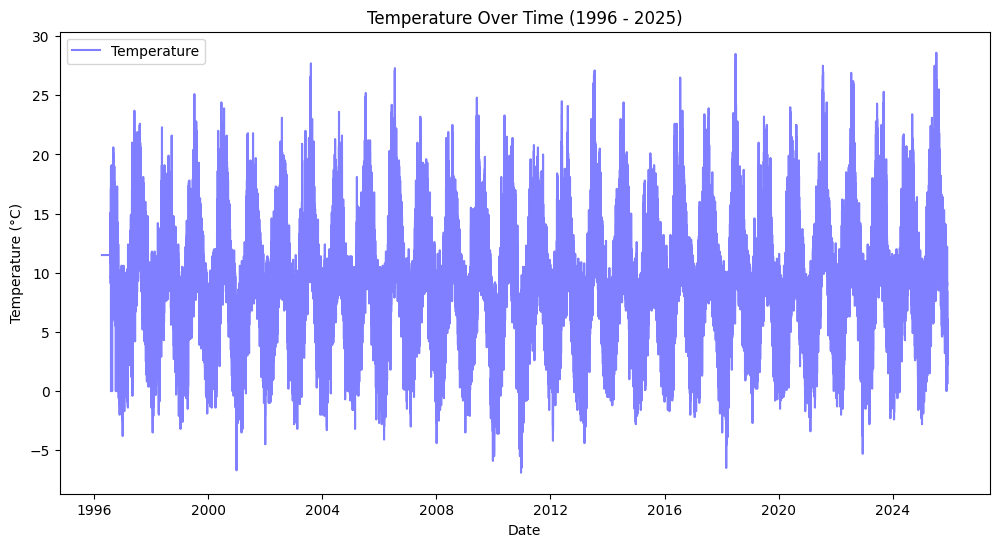

In [41]:
# Temperature plot: 1996 - 2025
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='date',
    y='temp',
    color='blue',
    alpha=0.5,
    label='Temperature'
)

plt.title('Temperature Over Time (1996 - 2025)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

- <b>2024 Temp Plot</b>

I also created a one-year temperature plot to focus on short-term trends that were hidden in the full 1996–2025 dataset. By limiting the data to a single year, I was able to better observe seasonal patterns and short-term variations.

The variables *date_from = "01/01/2024 00:00"* and *date_to = "01/01/2025 00:00"* defined the start and end of the time window used to filter the dataset. Using *df.loc[date_from:date_to]* selected only the rows where the index (the datetime column) fell within this range, allowing precise slicing of the time-series data ([Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)), ([Pandas documentation](https://pandas.pydata.org/docs/user_guide/timeseries.html)).  

Text(0, 0.5, 'Temperature (°C)')

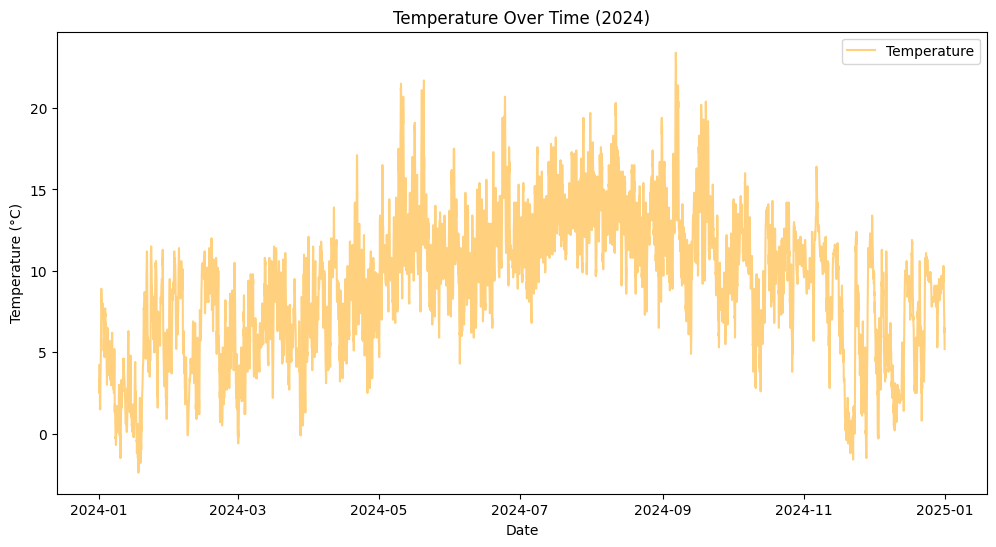

In [42]:
# Temperature plot over one year: 2024
date_from = "01/01/2024 00:00"
date_to = "01/01/2025 00:00"

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df.loc[date_from:date_to],
    x="date",
    y="temp",
    color='orange',
    alpha=0.5,
    label='Temperature'
)

plt.title('Temperature Over Time (2024)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

<b>1.2 Daily Mean Temperature Plot</b>

- <b>1996-2025 Daily Mean Temp Plot</b>

I computed the daily mean temperature by resampling the hourly temperature data by day and calculating the mean for each day ([Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)), ([Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)), ([Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)). I then plotted the daily mean using Seaborn’s lineplot ([Seaborn](https://seaborn.pydata.org/generated/seaborn.lineplot.html)), setting transparency with alpha=0.5 to improve readability. I used Matplotlib to set the figure size, add the title, and label the axes ([Matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)).

In [43]:
# compute daily mean temp 1996-2025
daily_mean1 = df['temp'].resample('D').mean()

Text(0, 0.5, 'Daily Mean Temperature (°C)')

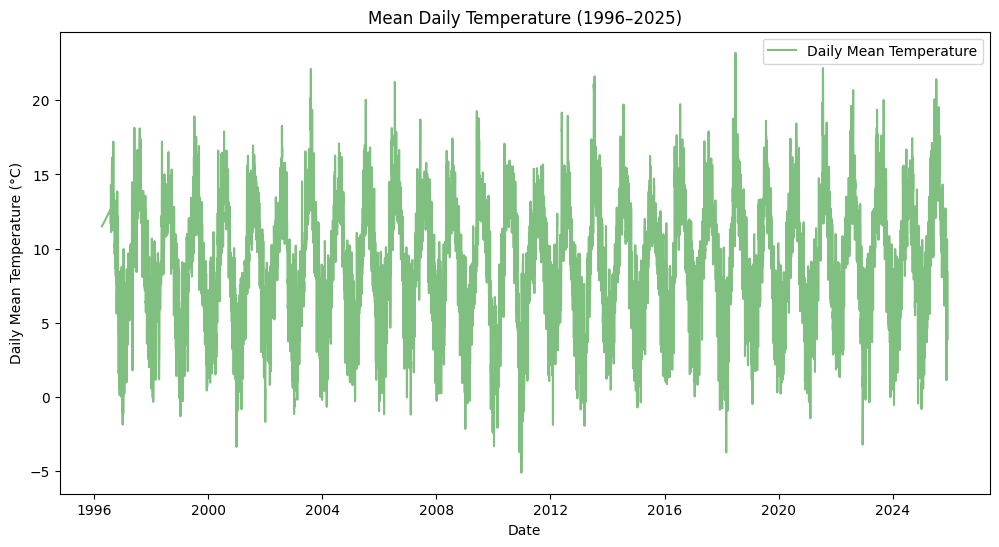

In [44]:
# Plot daily mean temperature
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=daily_mean1.index,
    y=daily_mean1.values,
    alpha=0.5,
    color='green',
    label='Daily Mean Temperature'
)

plt.title("Mean Daily Temperature (1996–2025)")
plt.xlabel("Date")
plt.ylabel("Daily Mean Temperature (°C)") 

- <b>June-August 2024 Daily Mean Temperature Plot</b>

Next, I filtered the dataset using the loc function to include only the summer months from June 20 to August 31, 2024, to focus on seasonal temperature patterns ([GeeksforGeeks](https://www.geeksforgeeks.org/python/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/)). 

In [45]:
# Filter data between 20 June 2024 and 31 August 2024
df_filtered = df.loc[
    (df.index >= '2024-06-20 00:00') & (df.index < '2024-08-31 00:00')
]

In [ ]:
# Compute daily mean temp June-August 2024
daily_mean2 = df_filtered["temp"].resample("D").mean()

Text(0, 0.5, 'Daily Mean Temperature (°C)')

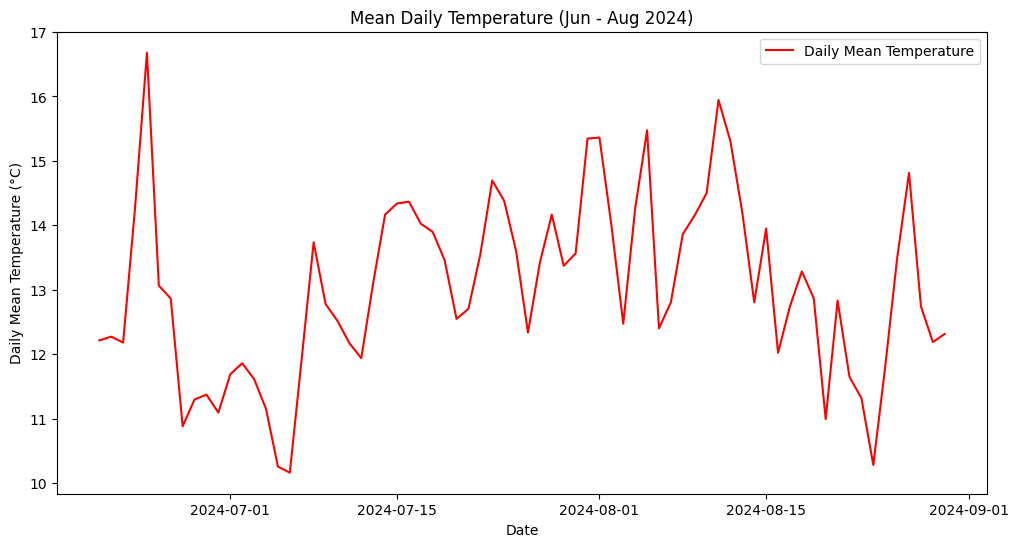

In [ ]:
# Plot daily mean temp for June-August 2024
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=daily_mean2.index,
    y=daily_mean2.values,
    color='red',
    label='Daily Mean Temperature'
)

plt.title("Mean Daily Temperature (Jun - Aug 2024)")
plt.xlabel("Date")
plt.ylabel("Daily Mean Temperature (°C)")

<b>1.3 Monthly Mean Temperature Plot</b>

- <b>1996-2025 Monthly Mean Temperature Plot</b>

I calculated the monthly mean temperature by resampling the dataset using *'MS'* (month start frequency) ([Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)) and taking the average temperature for each month. I then plotted the monthly means using Seaborn’s lineplot ([Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)). I used Matplotlib to set the figure size, title, and axis labels ([Matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)).

In [48]:
# Calculate Monthly Mean Temp 1996 - 2025
monthly_mean_temp = df["temp"].resample("MS").mean()

Text(0, 0.5, 'Monthly Mean Temperature (°C)')

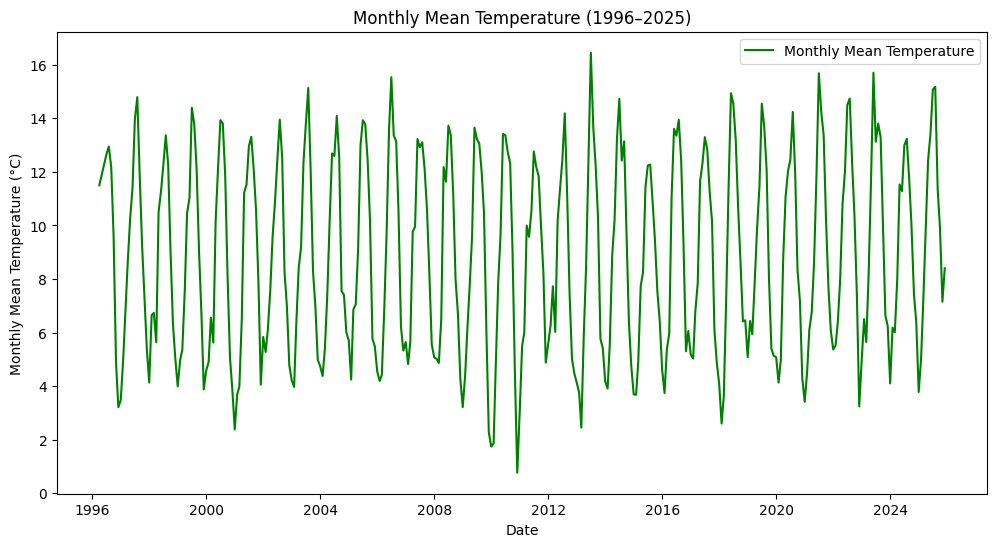

In [49]:
# Plot Monthly Mean Temp 1996 - 2025
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=monthly_mean_temp.index,
    y=monthly_mean_temp.values,
    color='g',
    label='Monthly Mean Temperature'
)

plt.title('Monthly Mean Temperature (1996–2025)')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Temperature (°C)')

- <b>2024 Monthly Mean Temperature Plot</b>

I filtered the data to include only the rows from 2024 so I could analyse the monthly temperature patterns for that specific year. I used *.copy()* to ensure the filtered DataFrame was a separate object, which prevents pandas view-related issues during resampling ([Pandas documentation](https://pandas.pydata.org/docs/user_guide/indexing.html#returning-a-view-versus-a-copy)). I then reused the same code structure that I applied to the 1996–2025 monthly mean calculation to keep the analysis consistent.

In [50]:
# Filter all rows in 2024
df_filtered = df.loc['2024-01-01':'2024-12-31'].copy()

In [51]:
# Calculate 2024 Monthly Mean Temp 
monthly_2024 = df_filtered['temp'].resample('MS').mean()

Text(0, 0.5, 'Monthly Mean Temperature (°C)')

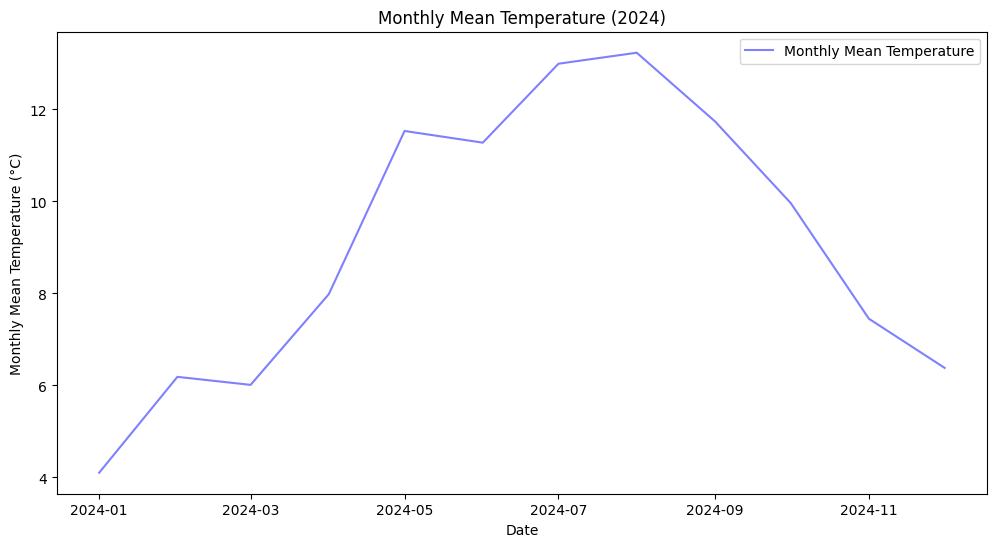

In [52]:
# Plot monthly mean temperature for 2024
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=monthly_2024.index,
    y=monthly_2024.values,
    color='b',
    alpha=0.5,
    label='Monthly Mean Temperature'
)

plt.title('Monthly Mean Temperature (2024)')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Temperature (°C)')

## <b>Section 2: WindSpeed Plots</b>

<b>Cleaning Data for Analysis</b>

In [53]:
# Check missing data 
print(df.isna().sum())

ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


In [54]:
# Dealing with missing windspeed data

# Replace empty or whitespace-only strings in DataFrame with NaN
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)

# Check how many missing (Nan) values in eahc column
print(df.isna().sum())


ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       62318
w        62319
sun          0
vis      64759
clht        18
clamt       18
dtype: int64


https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html  
https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe

In [55]:
# Drops rows where column wdsp is NaN.
df = df.dropna(subset=["wdsp"])                 
# Remove rows where column has empty strings
df = df[df["wdsp"].str.strip() != '']       

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html

In [56]:
# convert wdsp values to float 
df["wdsp"] = df["wdsp"].astype(float)
df["wdsp"]

date
1996-04-10 14:00:00     0.0
1996-07-31 08:00:00     0.0
1996-07-31 09:00:00     0.0
1996-07-31 10:00:00     0.0
1996-07-31 11:00:00     0.0
                       ... 
2025-11-30 20:00:00    17.0
2025-11-30 21:00:00    14.0
2025-11-30 22:00:00    10.0
2025-11-30 23:00:00     6.0
2025-12-01 00:00:00     8.0
Name: wdsp, Length: 257104, dtype: float64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

<b>2024 Mean Wind Speed Plot</b>

In [57]:
# Filter for Year 2024 January - March
df_2024 = df.loc['2024-01-01 00:00':'2024-03-31 00:00']

Text(0, 0.5, 'Mean Windspeed')

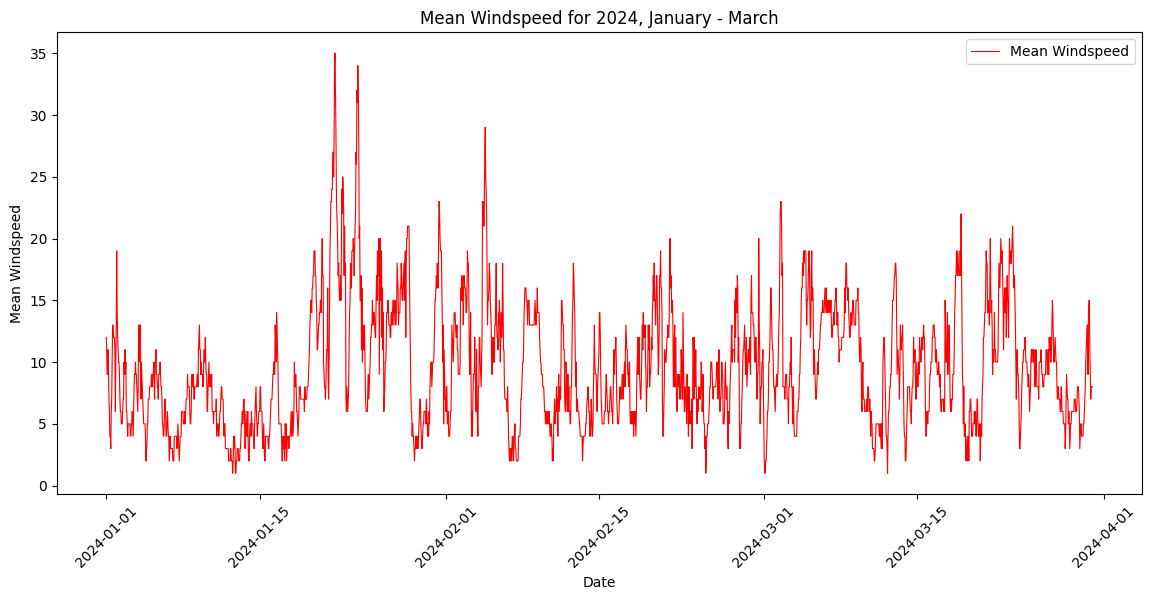

In [58]:
# Plot Mean Wind Speed over 2024 January - March
plt.figure(figsize=(14,6))
sns.lineplot(x=df_2024.index, y=df_2024['wdsp'],
             color='r',  
             label='Mean Windspeed',
             linewidth=0.8,     
             marker=None
             ) 

plt.xticks(rotation=45) 
plt.title("Mean Windspeed for 2024, January - March")
plt.xlabel("Date")
plt.ylabel("Mean Windspeed")

<b>2.2 Plot of Rolling Windspeed Over 24 hours</b>

In [59]:
# Filter all rows where index is 31st Oct 2025
df_31oct = df[df.index.date == pd.to_datetime("2025-10-31").date()].copy() # Prevent SettingWithCopyWarning

https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [60]:
# Calculate rolling windspeed over 24 hours 
df_31oct['windspeed_24h'] = df_31oct['wdsp'].rolling(window=24, min_periods=1).mean()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

In [61]:
# Check data
print(df_31oct[['wdsp', 'windspeed_24h']].head(25))

                     wdsp  windspeed_24h
date                                    
2025-10-31 00:00:00  20.0      20.000000
2025-10-31 01:00:00  20.0      20.000000
2025-10-31 02:00:00  20.0      20.000000
2025-10-31 03:00:00  20.0      20.000000
2025-10-31 04:00:00  20.0      20.000000
2025-10-31 05:00:00  17.0      19.500000
2025-10-31 06:00:00  17.0      19.142857
2025-10-31 07:00:00  19.0      19.125000
2025-10-31 08:00:00  17.0      18.888889
2025-10-31 09:00:00  16.0      18.600000
2025-10-31 10:00:00  15.0      18.272727
2025-10-31 11:00:00  16.0      18.083333
2025-10-31 12:00:00  16.0      17.923077
2025-10-31 13:00:00  17.0      17.857143
2025-10-31 14:00:00  17.0      17.800000
2025-10-31 15:00:00  18.0      17.812500
2025-10-31 16:00:00  18.0      17.823529
2025-10-31 17:00:00  16.0      17.722222
2025-10-31 18:00:00  12.0      17.421053
2025-10-31 19:00:00  13.0      17.200000
2025-10-31 20:00:00  13.0      17.000000
2025-10-31 21:00:00  13.0      16.818182
2025-10-31 22:00

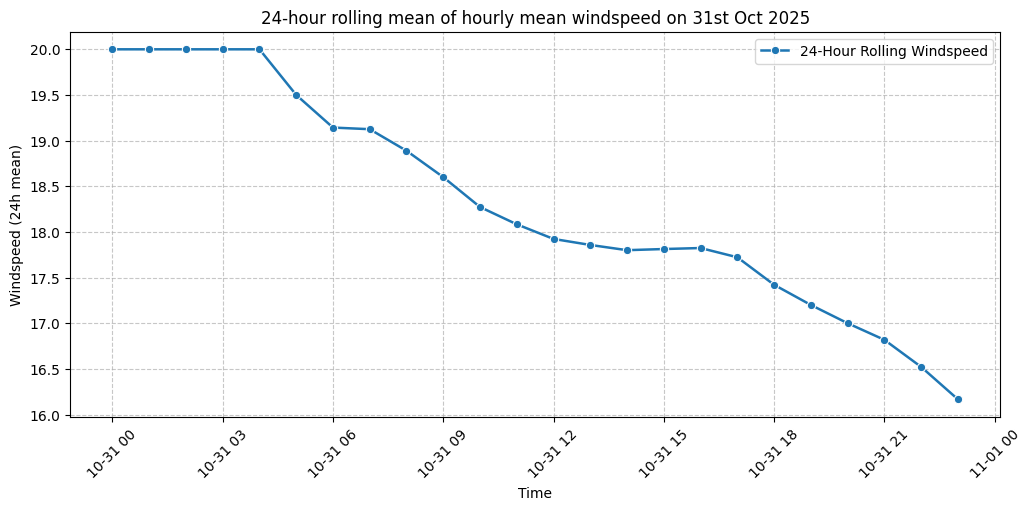

In [62]:
# Plot Rolling Windspeed
plt.figure(figsize=(12,5))

sns.lineplot(
    x=df_31oct.index,
    y=df_31oct['windspeed_24h'],
    linewidth=1.8,
    marker='o',
    label='24-Hour Rolling Windspeed')

plt.xticks(rotation=45) 
plt.title("24-hour rolling mean of hourly mean windspeed on 31st Oct 2025")
plt.xlabel("Time")
plt.ylabel("Windspeed (24h mean)")
plt.grid(True, linestyle='--', alpha=0.7)

<b>2.3 Plot for Max Windspeed Per day - Week Starting the 1st of Oct 2025</b>

In [63]:
# Define week range
start_date = "2025-10-01"
end_date = "2025-10-07" 

# Filter rows for the week
df_week = df.loc[start_date:end_date].copy()

In [64]:
# Daily maximum windspeed
df_daily_max = df_week['wdsp'].resample('D').max()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

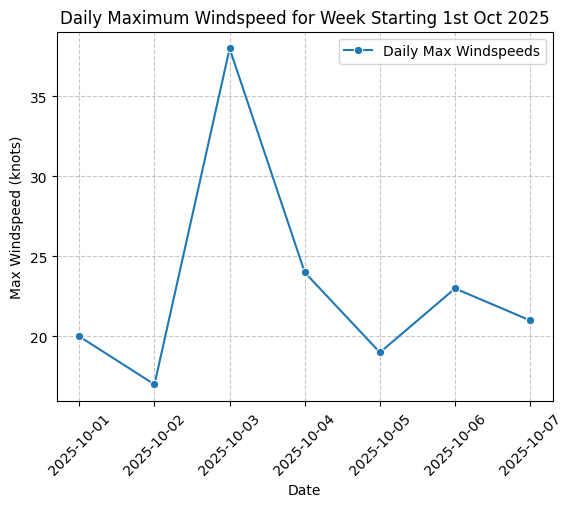

In [65]:
# Plot daily max windspeeds
sns.lineplot(x=df_daily_max.index, 
             y=df_daily_max.values, 
             marker='o', linewidth=1.5,
             label='Daily Max Windspeeds')

plt.title("Daily Maximum Windspeed for Week Starting 1st Oct 2025")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Max Windspeed (knots)")
plt.grid(True, linestyle='--', alpha=0.7)

<b>2.4 Plot of Monthly Mean of the Daily Max Windspeeds in 2024</b>

In [66]:
# Filter all rows in 2024
df_2024 = df.loc['2024-01-01':'2024-12-31'].copy()

In [67]:
# Resample by day and take the maximum windspeed for each day
df_daily_max = df_2024['wdsp'].resample('D').max()

In [68]:
# Resample by month and calculate mean of daily max
monthly_mean_max = df_daily_max.resample('ME').mean()

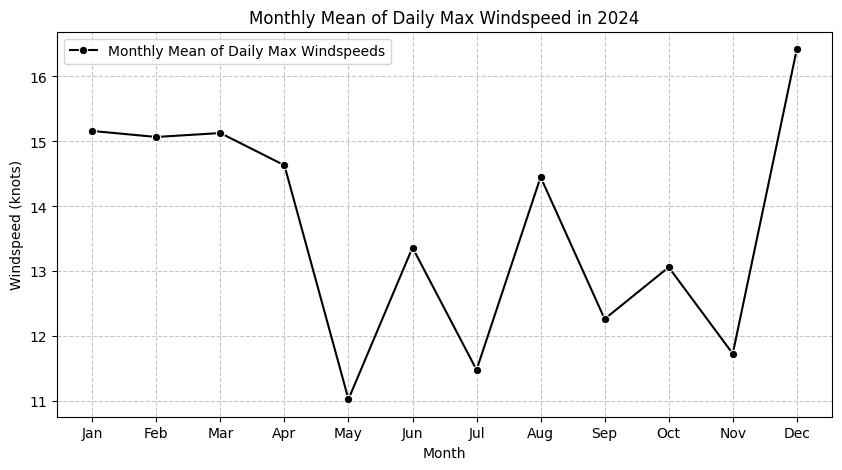

In [69]:
# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_mean_max.index.strftime('%b'),
             y=monthly_mean_max.values, 
             marker='o', linewidth=1.5,
             color='black',
             label='Monthly Mean of Daily Max Windspeeds')

plt.title("Monthly Mean of Daily Max Windspeed in 2024")
plt.xlabel("Month")
plt.ylabel("Windspeed (knots)")
plt.grid(True, linestyle='--', alpha=0.7)

https://www.geeksforgeeks.org/python/python-strftime-function/

# End